In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [21]:
datafile_path = 'ambient_temperature_system_failure.csv'
raw_dt = pd.read_csv(datafile_path)
data = raw_dt.copy()

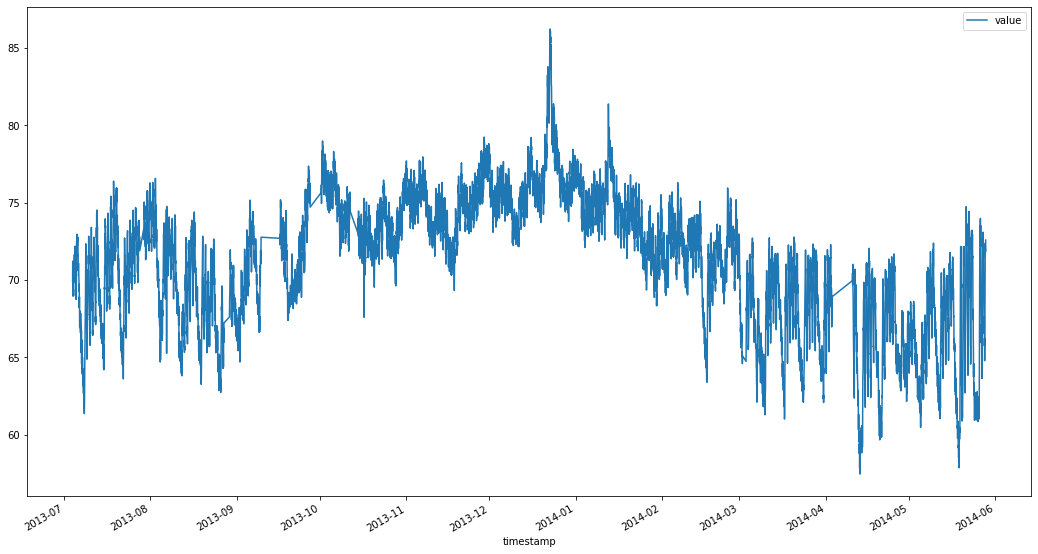

In [25]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.plot(x='timestamp', y='value', figsize=(18, 10))

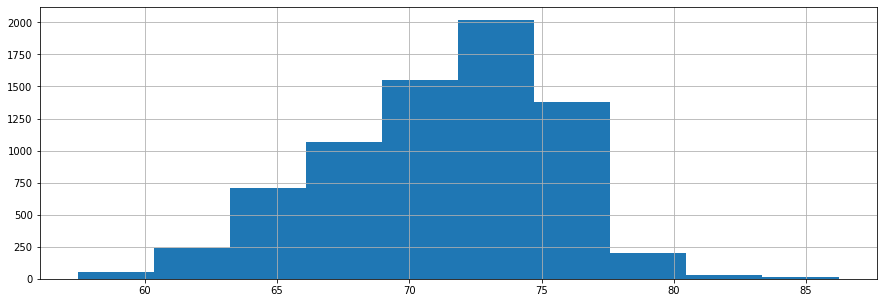

In [27]:
#histogram
data['value'].hist(figsize=(15,5))

In [23]:
data.describe()

,value
count,7267.000000
mean,71.242433
std,4.247509
min,57.458406
25%,68.369411
50%,71.858493
75%,74.430958
max,86.223213


In [36]:
data['hour'] = data['timestamp'].dt.hour + data['timestamp'].dt.minute / 60
data['day_of_week'] = data['timestamp'].dt.dayofweek
data['is_weekend'] = 0
data.loc[data['day_of_week'] == 5, 'is_weekend'] = 1
data.loc[data['day_of_week'] == 6, 'is_weekend'] = 1
data['daylight'] = data['timestamp'].dt.strftime("%p")
data['month'] = data['timestamp'].dt.month
data['year'] = data['timestamp'].dt.year
data['t'] = (data['timestamp'].astype(np.int64)/1e11).astype(np.int64)

In [9]:
data

,timestamp,value,hour,day_of_week,is_weekend,daylight,month,t
0,2013-07-04 00:00:00,69.880835,0.0,3,0,AM,7,13728960
1,2013-07-04 01:00:00,71.220227,1.0,3,0,AM,7,13728996
2,2013-07-04 02:00:00,70.877805,2.0,3,0,AM,7,13729032
3,2013-07-04 03:00:00,68.959400,3.0,3,0,AM,7,13729068
4,2013-07-04 04:00:00,69.283551,4.0,3,0,AM,7,13729104
...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,11.0,2,0,AM,5,14012748
7263,2014-05-28 12:00:00,72.172956,12.0,2,0,PM,5,14012784
7264,2014-05-28 13:00:00,72.046565,13.0,2,0,PM,5,14012820
7265,2014-05-28 14:00:00,71.825226,14.0,2,0,PM,5,14012856


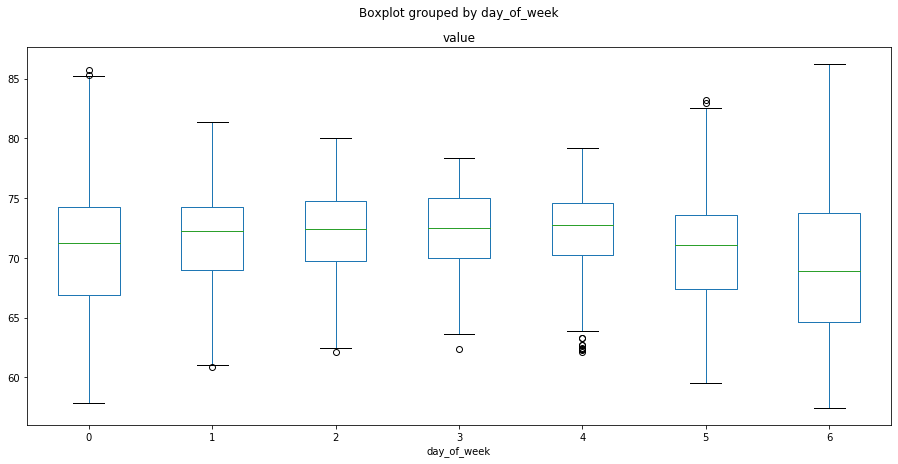

In [37]:
data.boxplot(by='day_of_week', column=['value'], grid=False, figsize=(15,7))

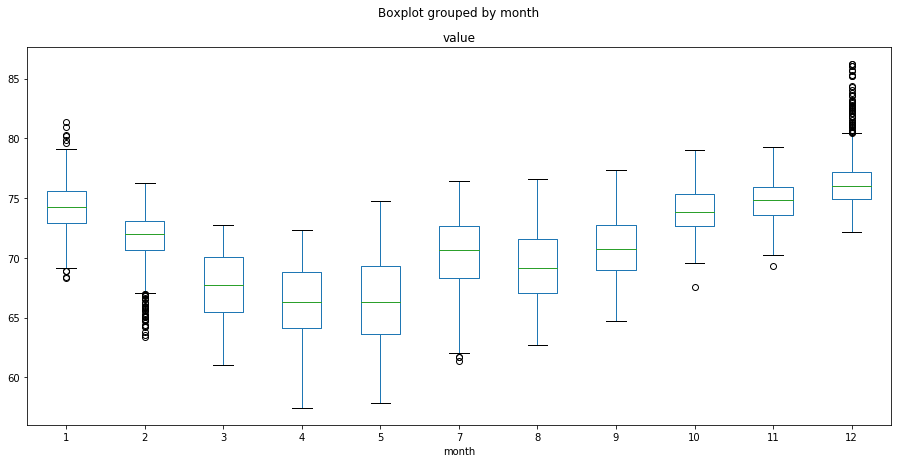

In [38]:
data.boxplot(by='month', column=['value'], grid=False, figsize=(15,7))

In [10]:
from sklearn.model_selection import train_test_split

tr_data, tst_data = train_test_split(data)
tr_data
tst_data

,timestamp,value,hour,day_of_week,is_weekend,daylight,month,year,t
3458,2013-12-11 21:00:00,75.143565,21.0,2,0,PM,12,2013,13867956
5026,2014-02-15 05:00:00,72.020378,5.0,5,1,AM,2,2014,13924404
3552,2013-12-15 19:00:00,77.713470,19.0,6,1,PM,12,2013,13871340
2387,2013-10-28 06:00:00,71.338296,6.0,0,0,AM,10,2013,13829400
1715,2013-09-23 09:00:00,70.514997,9.0,0,0,AM,9,2013,13799268
...,...,...,...,...,...,...,...,...,...
4557,2014-01-26 16:00:00,70.299235,16.0,6,1,PM,1,2014,13907520
4220,2014-01-12 15:00:00,75.717496,15.0,6,1,PM,1,2014,13895388
2029,2013-10-10 10:00:00,72.755208,10.0,3,0,AM,10,2013,13813992
6852,2014-05-11 09:00:00,63.645231,9.0,6,1,AM,5,2014,13997988


In [12]:
#Missing Values

print('Number of missins by feature:\n',data.isnull().sum())

Number of missins by feature:
 timestamp      0
value          0
hour           0
day_of_week    0
is_weekend     0
daylight       0
month          0
year           0
t              0
dtype: int64


In [13]:
#Incorrect Values
from numpy import nan
i = 0
for row in data['value']:
    try:
        float(row)
    except ValueError:
        data.loc[cnt, 'value'] = nan
    i += 1
print(data.isnull().values.any())

False


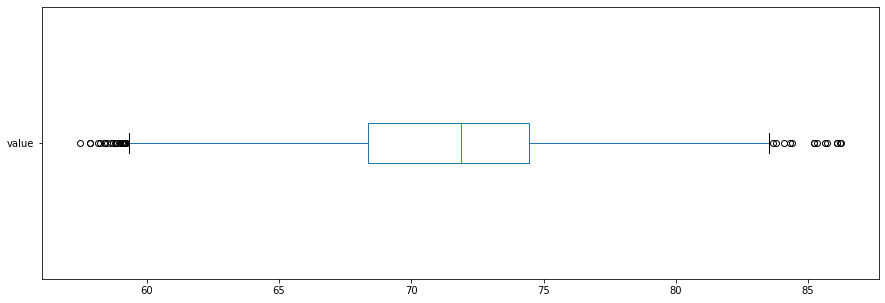

In [24]:
#Outliers
data['value'].plot.box(vert=False, figsize=(15,5))

In [34]:
#find outliers
def detect_IQR(df,feature):
    q1 = df[feature].quantile(q=0.25)
    q3 = df[feature].quantile(q=0.75)
    IQR = q3-q1
    low= q1 - 1.5*IQR
    up = q3 + 1.5*IQR
    
    return low,up
low, up = detect_IQR(data,"value")

IQR_result=pd.DataFrame()
IQR_result['timestamp']=data['timestamp']
IQR_result['value'] = data['value']

#Inliers are labeled 1, while outliers are labeled -1.
IQR_result.loc[(IQR_result["value"]<low) | (IQR_result["value"]>up),"outlier"] = -1
IQR_result.loc[(IQR_result["value"]>=low) & (IQR_result["value"]<=up),"outlier"] = 1
IQR_result[IQR_result['outlier']==-1]


,timestamp,value,outlier
3702,2013-12-22 01:00:00,83.780995,-1.0
3718,2013-12-22 17:00:00,84.390932,-1.0
3719,2013-12-22 18:00:00,85.227685,-1.0
3720,2013-12-22 19:00:00,86.094888,-1.0
3721,2013-12-22 20:00:00,86.204189,-1.0
3722,2013-12-22 21:00:00,86.223213,-1.0
3723,2013-12-22 22:00:00,85.649437,-1.0
3724,2013-12-22 23:00:00,86.074710,-1.0
3725,2013-12-23 00:00:00,85.326165,-1.0
3726,2013-12-23 01:00:00,85.705990,-1.0


In [39]:
from sklearn.preprocessing import LabelEncoder
cont_vars = ['value', 'hour', 't']
cat_vars = [ 'month', 'day_of_week', 'is_weekend', 'daylight', 'year']
#encode the categorical data
label_encoders = [LabelEncoder() for _ in cat_vars]
for col, enc in zip(cat_vars, label_encoders):
    data[col] = enc.fit_transform(data[col])
data

,timestamp,value,hour,day_of_week,is_weekend,daylight,month,year,t
0,2013-07-04 00:00:00,69.880835,0.0,3,0,0,5,0,13728960
1,2013-07-04 01:00:00,71.220227,1.0,3,0,0,5,0,13728996
2,2013-07-04 02:00:00,70.877805,2.0,3,0,0,5,0,13729032
3,2013-07-04 03:00:00,68.959400,3.0,3,0,0,5,0,13729068
4,2013-07-04 04:00:00,69.283551,4.0,3,0,0,5,0,13729104
...,...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,11.0,2,0,0,4,1,14012748
7263,2014-05-28 12:00:00,72.172956,12.0,2,0,1,4,1,14012784
7264,2014-05-28 13:00:00,72.046565,13.0,2,0,1,4,1,14012820
7265,2014-05-28 14:00:00,71.825226,14.0,2,0,1,4,1,14012856


In [18]:
#normalise the continuous variables
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(data[cont_vars])
data_scaled = data.copy()
data_scaled[cont_vars] = scaler.transform(data[cont_vars])
data_scaled

,timestamp,value,hour,day_of_week,is_weekend,daylight,month,year,t
0,2013-07-04 00:00:00,-0.320586,-1.661537,3,0,0,5,2013,-1.755168
1,2013-07-04 01:00:00,-0.005228,-1.517172,3,0,0,5,2013,-1.754728
2,2013-07-04 02:00:00,-0.085851,-1.372807,3,0,0,5,2013,-1.754287
3,2013-07-04 03:00:00,-0.537536,-1.228442,3,0,0,5,2013,-1.753847
4,2013-07-04 04:00:00,-0.461215,-1.084077,3,0,0,5,2013,-1.753406
...,...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,0.265532,-0.073523,2,0,0,4,2014,1.716225
7263,2014-05-28 12:00:00,0.219090,0.070841,2,0,1,4,2014,1.716665
7264,2014-05-28 13:00:00,0.189332,0.215206,2,0,1,4,2014,1.717105
7265,2014-05-28 14:00:00,0.137218,0.359571,2,0,1,4,2014,1.717546


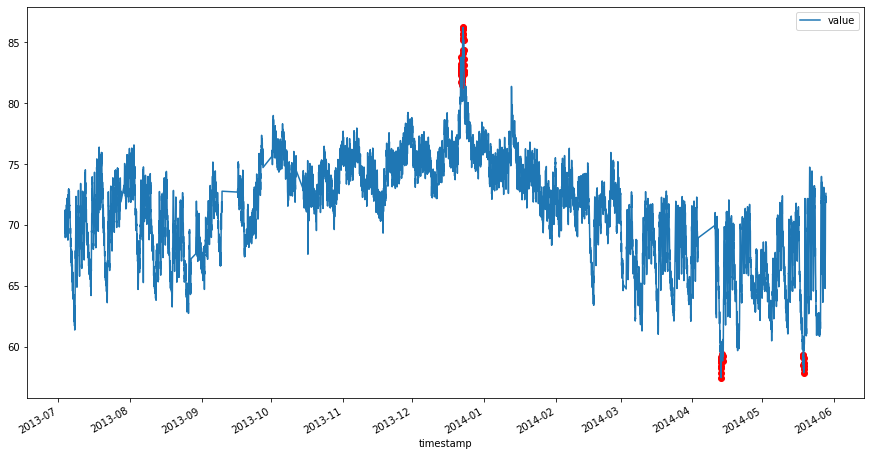

In [45]:
#isolation forest
from sklearn.ensemble import IsolationForest

iso=IsolationForest(contamination=0.008)
iso_result=iso.fit_predict(data['value'].values.reshape(-1,1))
iso_result_df=pd.DataFrame()
iso_result_df['timestamp']=data['timestamp']
iso_result_df['value'] = data['value']

#Inliers are labeled 1, while outliers are labeled -1.
iso_result_df['anomaly']  = [1 if i==-1 else 0 for i in iso_result]

iso_result_df.plot(x='timestamp', y='value', figsize=(15,8))

a=iso_result_df[iso_result_df['anomaly']==1]

plt.scatter(x=a.timestamp, y=a.value, color='r')